=== Dataset Overview ===
Shape: (50, 7)

First 5 rows:
   Product Region  Sales  Profit  Discount         Category        Date
0       B  North    994      49      0.12        Furniture  01-01-2023
1       E   East    257     154      0.33      Electronics  02-01-2023
2       E   East    991     167      0.22         Clothing  03-01-2023
3       C   West    295     211      0.38  Office Supplies  04-01-2023
4       E  South    845     204      0.03         Clothing  05-01-2023

Data Types & Non-null info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   50 non-null     object 
 1   Region    50 non-null     object 
 2   Sales     50 non-null     int64  
 3   Profit    50 non-null     int64  
 4   Discount  50 non-null     float64
 5   Category  50 non-null     object 
 6   Date      50 non-null     object 
dtypes: float64(1), int64(2), object

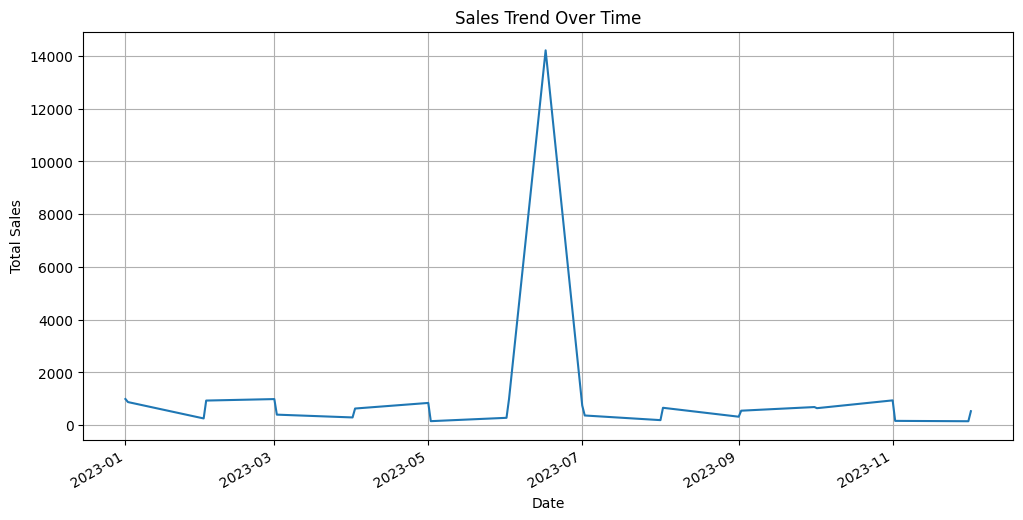

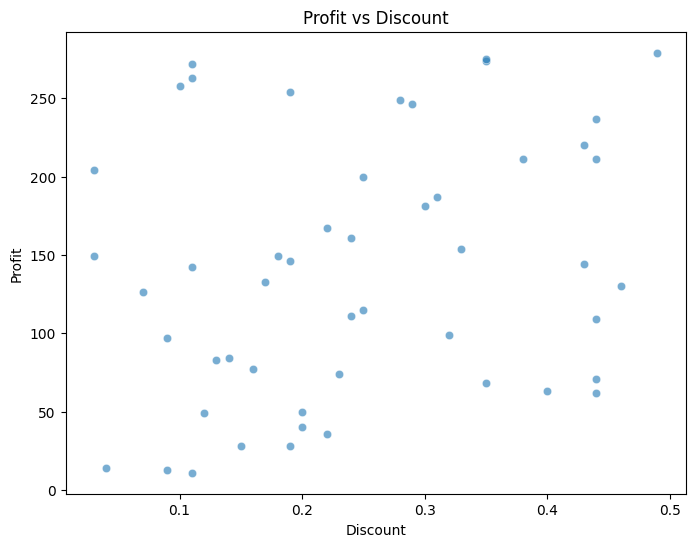

/tmp/ipython-input-3696976808.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="Sales", data=df, estimator=sum, ci=None)


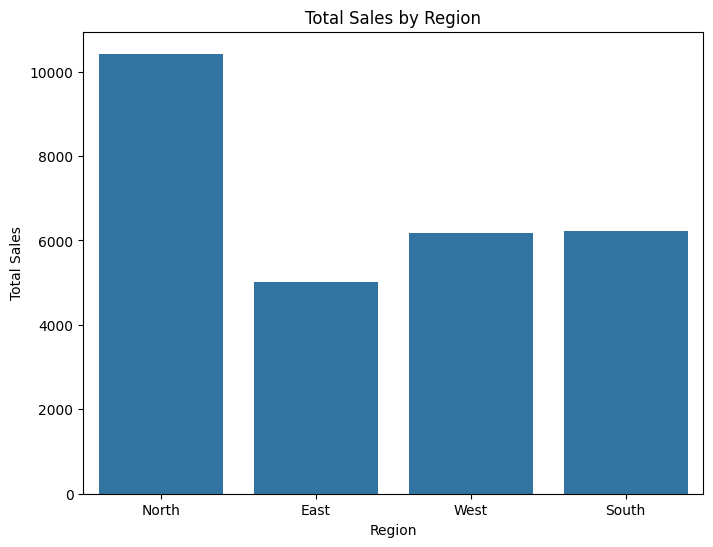

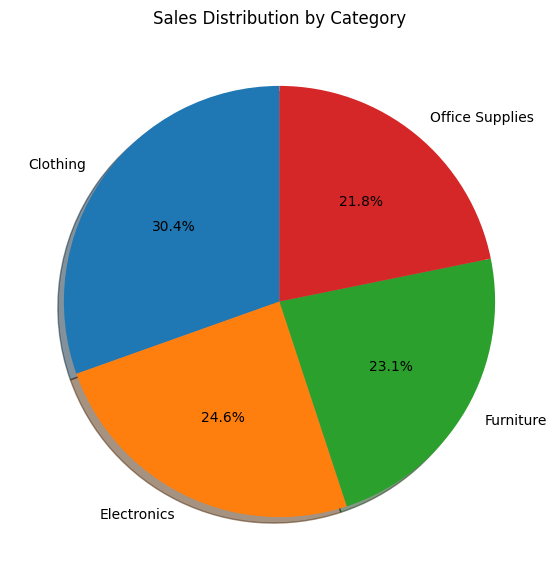


=== Linear Regression Model Results ===
Intercept: 672.5502974312517
Coefficients (Profit, Discount): [-2.36387259e-01 -2.89655374e+02]
Mean Squared Error (MSE): 64276.844167015326
R² Score: -0.14943360017695362


In [4]:
# -------------------------------
# Sales Data Analysis - Full Script
# -------------------------------

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# import Dataset
df = pd.read_csv("/content/sales_data (3).csv")

print("=== Dataset Overview ===")
print("Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData Types & Non-null info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())#remove duplicates
print("\nStatistical Summary:\n", df.describe())
print("\nUnique Categories & Regions:")
print("Category:", df['Category'].unique())
print("Region:", df['Region'].unique())

#  Data Cleaning
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)
# Fill missing values
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
median_date = df['Date'].median()
df['Date'] = df['Date'].fillna(median_date)

# Data Analysis-

# sales trend
sales_trend = df.groupby('Date')['Sales'].sum()
plt.figure(figsize=(12,6))
sales_trend.plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# 4.2 Profit vs Discount Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="Discount", y="Profit", data=df, alpha=0.6)
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

# 4.3 Sales by Region (Bar Plot)
plt.figure(figsize=(8,6))
sns.barplot(x="Region", y="Sales", data=df, estimator=sum, ci=None)
plt.title("Total Sales by Region")
plt.ylabel("Total Sales")
plt.show()

# 4.4 Sales by Category (Pie Chart)
category_sales = df.groupby("Category")["Sales"].sum()
plt.figure(figsize=(7,7))
category_sales.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.show()

# 5. Predictive Modeling

X = df[['Profit', 'Discount']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Linear Regression Model Results ===")
print("Intercept:", model.intercept_)
print("Coefficients (Profit, Discount):", model.coef_)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)




Please upload the `sales_data.csv` file using the following code cell: